# Car Price Prediction - Using ML

## Video Explaination :[Car Price Prediction Video](https://drive.google.com/file/d/1a69s13QuP8JTCXJvaTfdR7zTyZKA6FOd/view?usp=sharing)

In [514]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px    # for data visualization
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
import mlflow
import mlflow.sklearn


In [479]:
df = pd.read_csv('/home/itachi/Downloads/car_price_prediction.csv')
df.head(5)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Data set information

In [480]:
df.shape

(19237, 18)

#### The dataset contains 19237 rows and 18 columns

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

#### From the informtion it can be inferred that:
- Engine volume ,Mileage are expected to be numerical values, but found to be object

#### Statistics of data set

In [482]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


#### Checking for null values in the data set

In [483]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

#### Checking for duplicate values

In [484]:
print("No.of duplicate values ",df.duplicated().sum())

No.of duplicate values  313


#### As ther are some '-' in Levy column , Lets Explore each column to find such un logical values

In [485]:
'''
for item in df.columns:
    print(df[item].value_counts())
'''
print(df['Levy'].value_counts())

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64


#### The frequency of '-' in Levy column is 5819

## Data Pre-Processing

In [486]:
# dropping unwanted columns
df.drop(['ID'],axis = 1,inplace = True)

In [487]:
df['Mileage'] = [float(value.split(' ')[0]) for value in df['Mileage']]
df['Engine volume'] = [float(value.split(' ')[0]) for value in df['Engine volume']]

In [488]:
# Converting non numerical data to NAN using pd.to_numeric
df['Levy'] = pd.to_numeric(df['Levy'],errors = 'coerce')

## Exploratory Data Analysis:

Text(0.5, 1.0, '# of each Category')

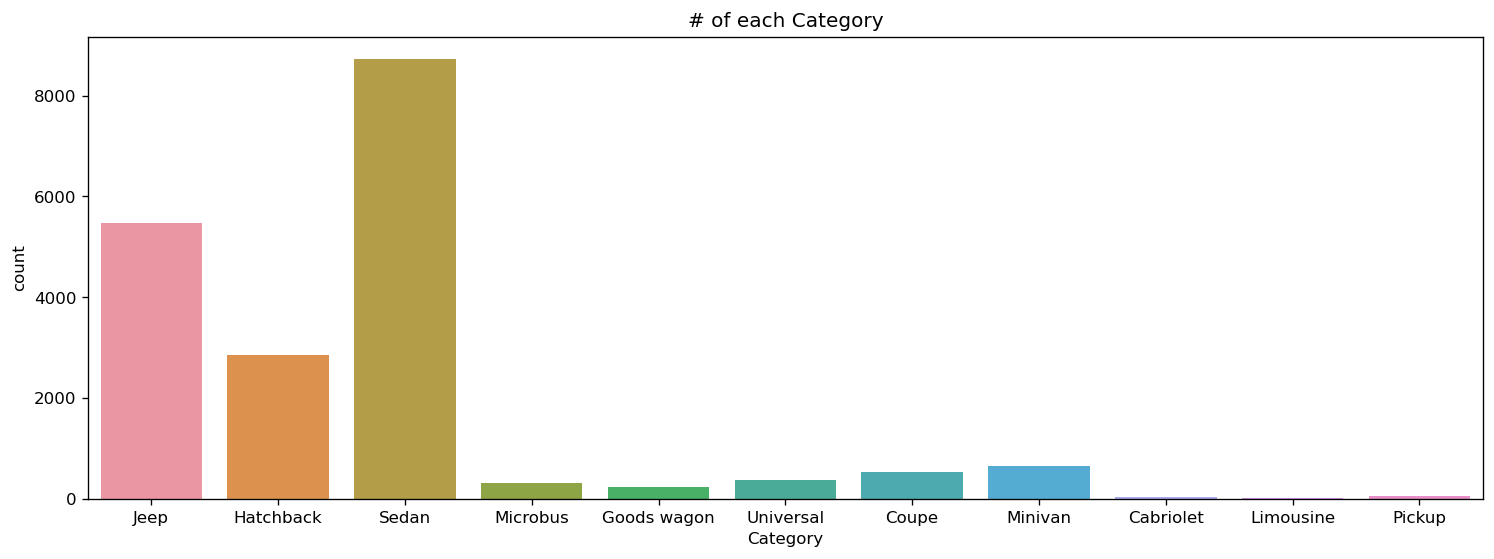

In [489]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= df, x='Category')
plt.title("# of each Category")

<Axes: xlabel='Levy', ylabel='Density'>

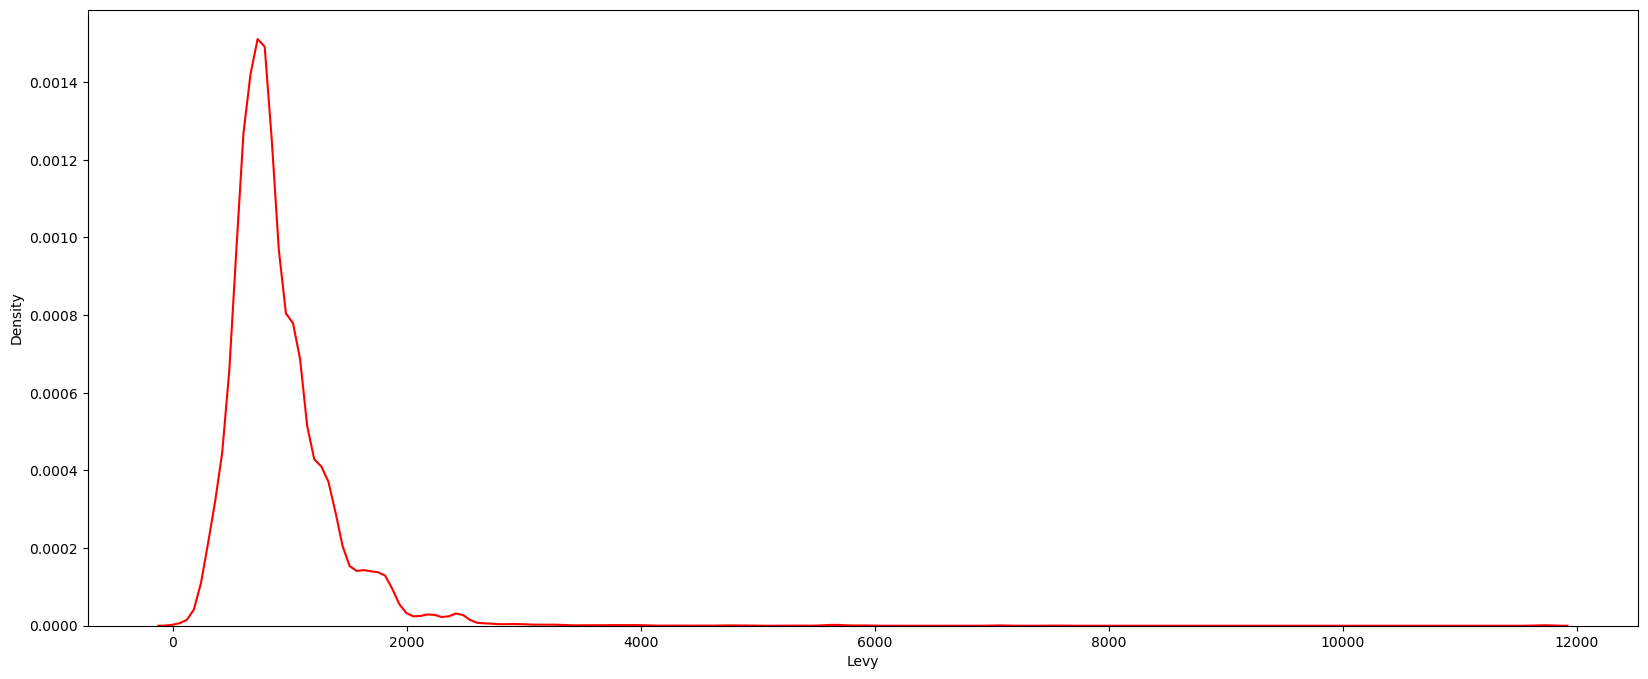

In [490]:
sns.kdeplot(df['Levy'], color='r')

#### Most cars have Levy around 1000

/tmp/ipykernel_9717/3339729594.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Airbags'], color='g', shade=True)


<Axes: xlabel='Airbags', ylabel='Density'>

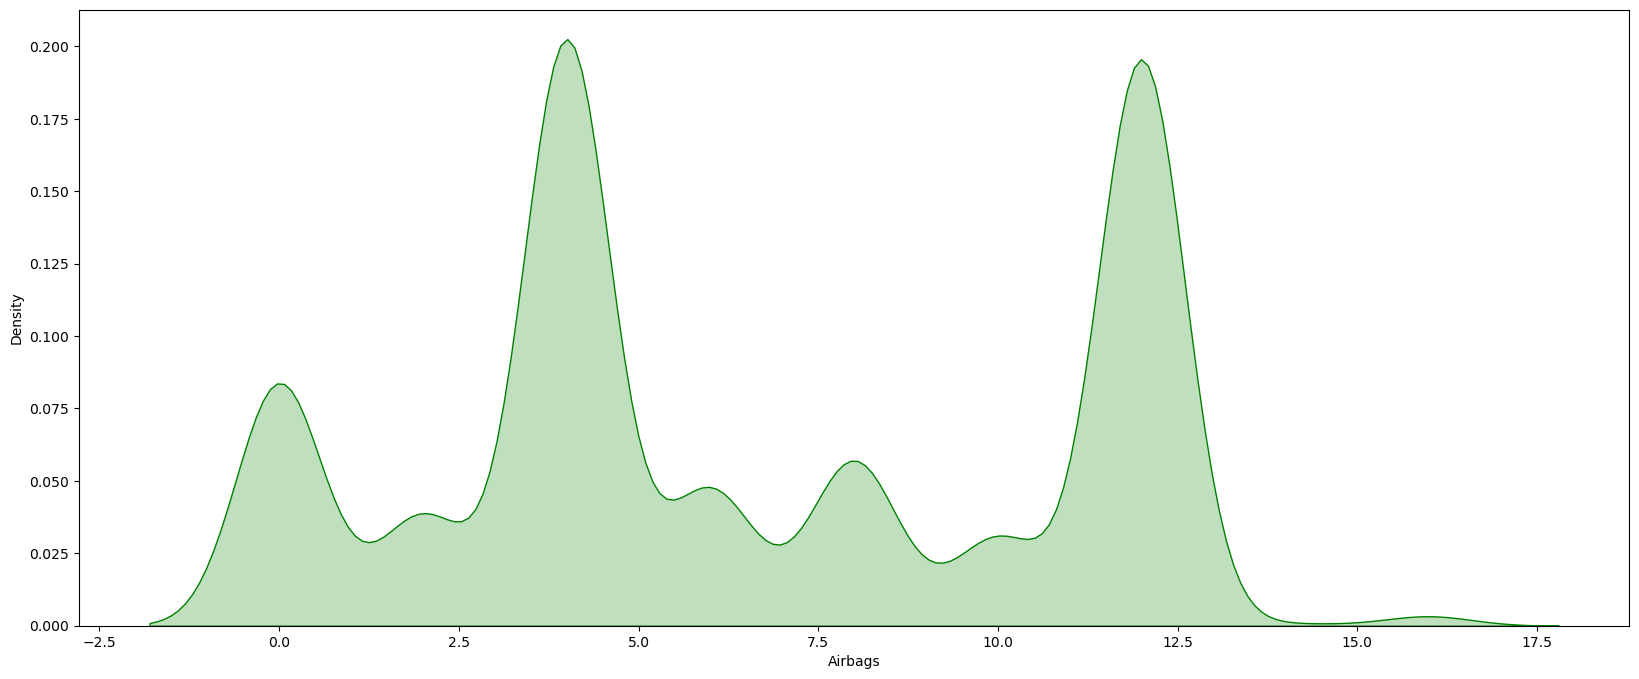

In [491]:
sns.kdeplot(df['Airbags'], color='g', shade=True)

#### Most card have 3 to 5 airbags or 11 to 13 airbags

<Axes: xlabel='Prod. year', ylabel='Count'>

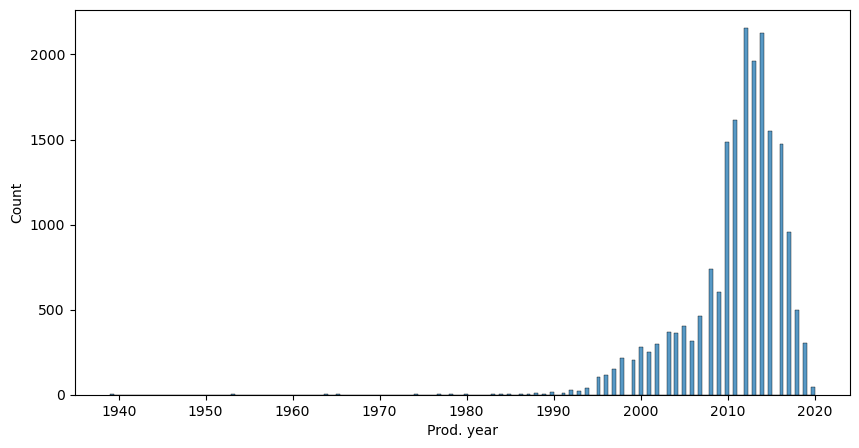

In [492]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(df['Prod. year'])

#### Most cars are produced around 2015 +/- 2 years

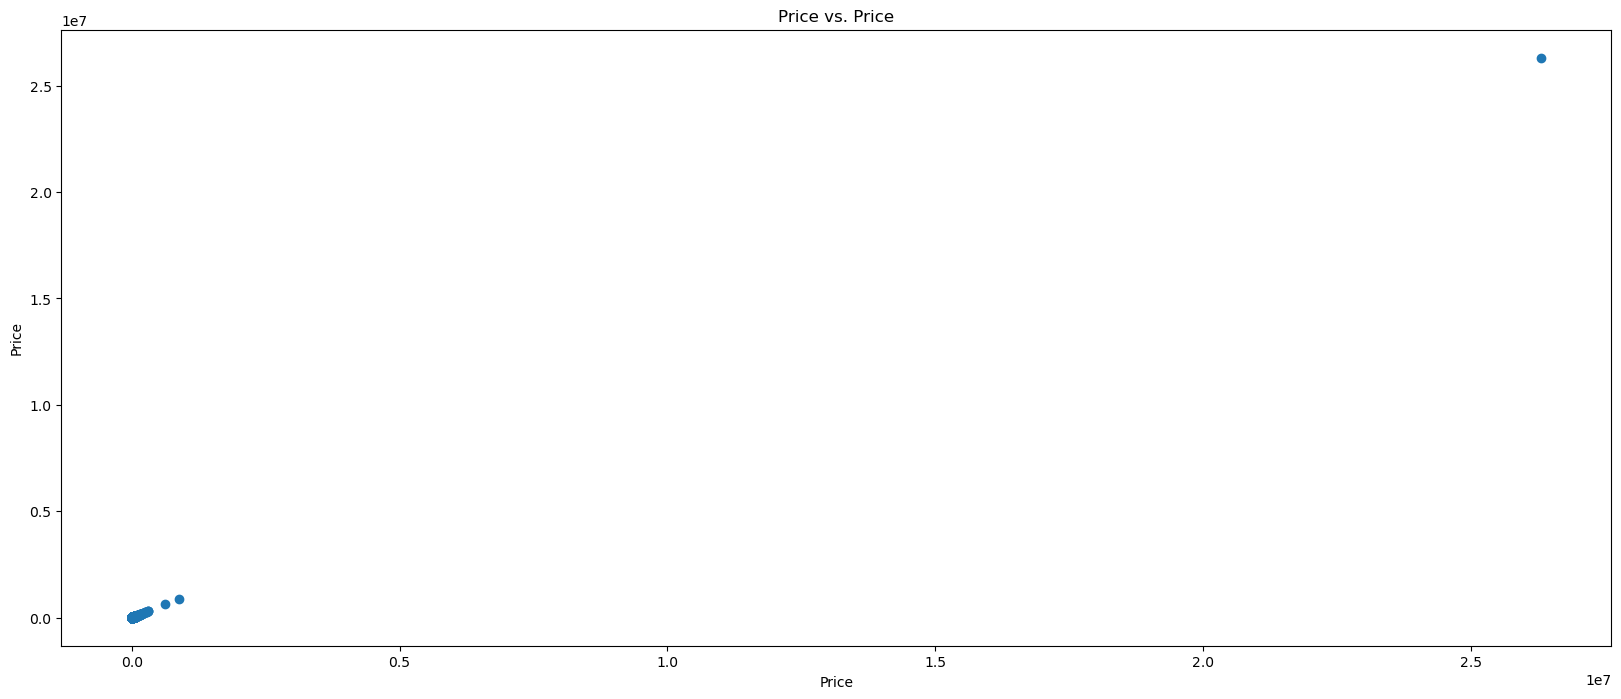

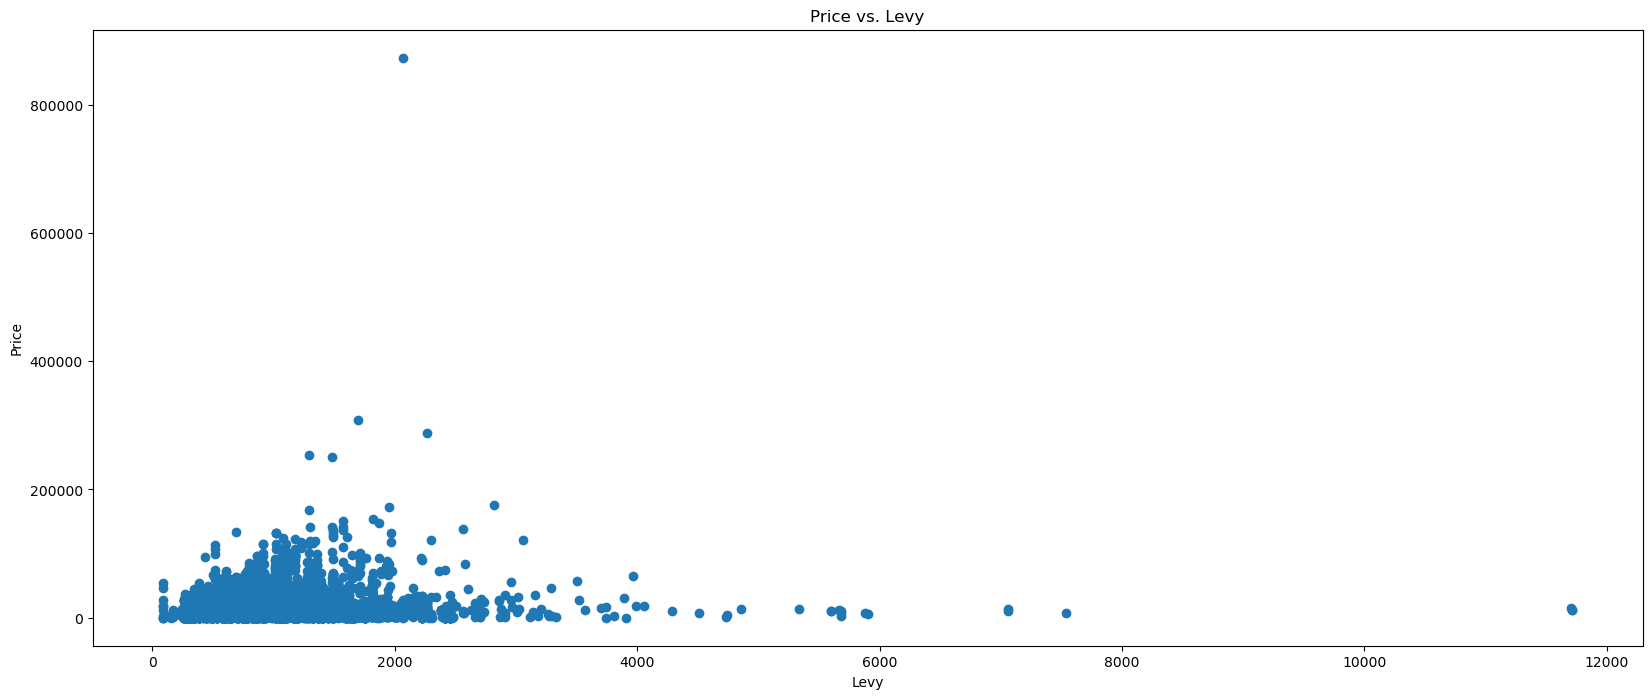

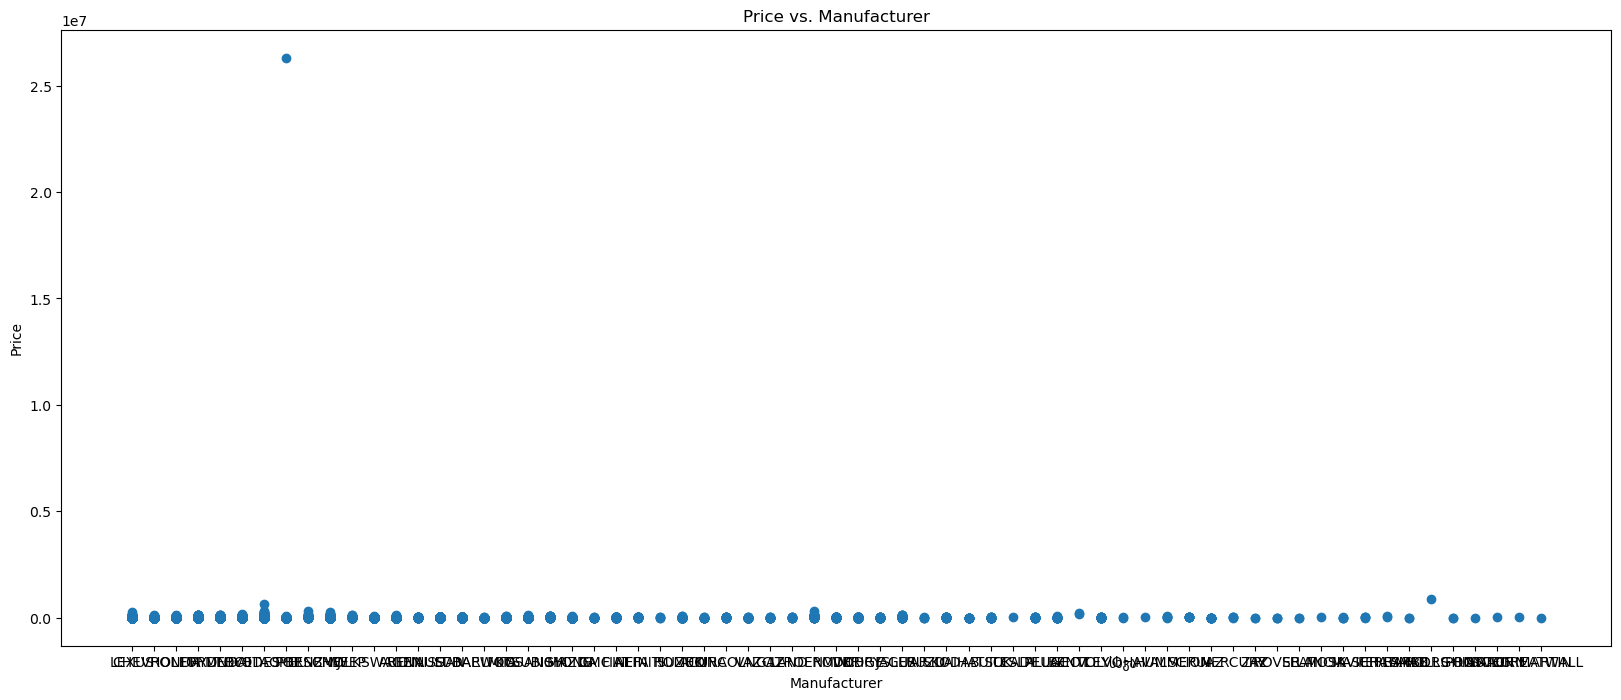

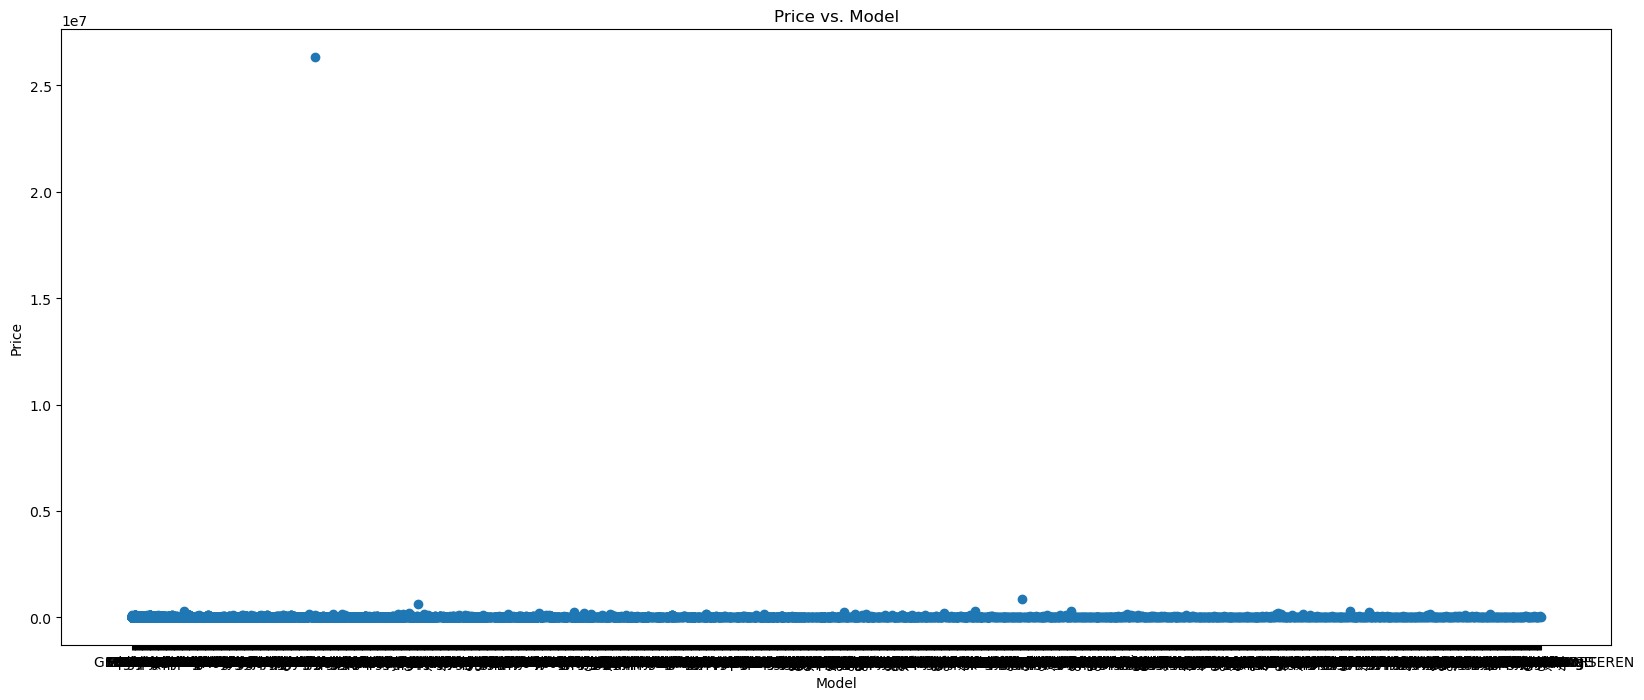

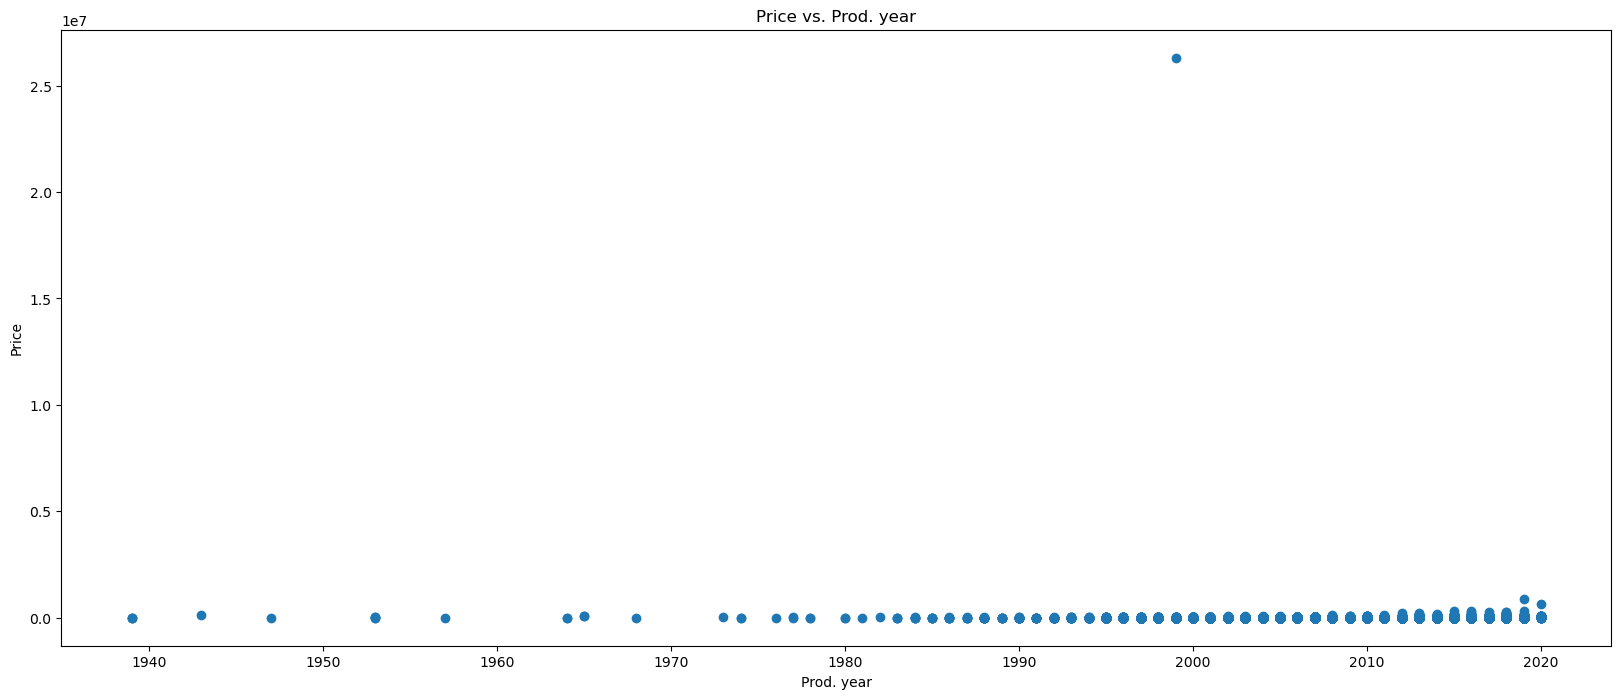

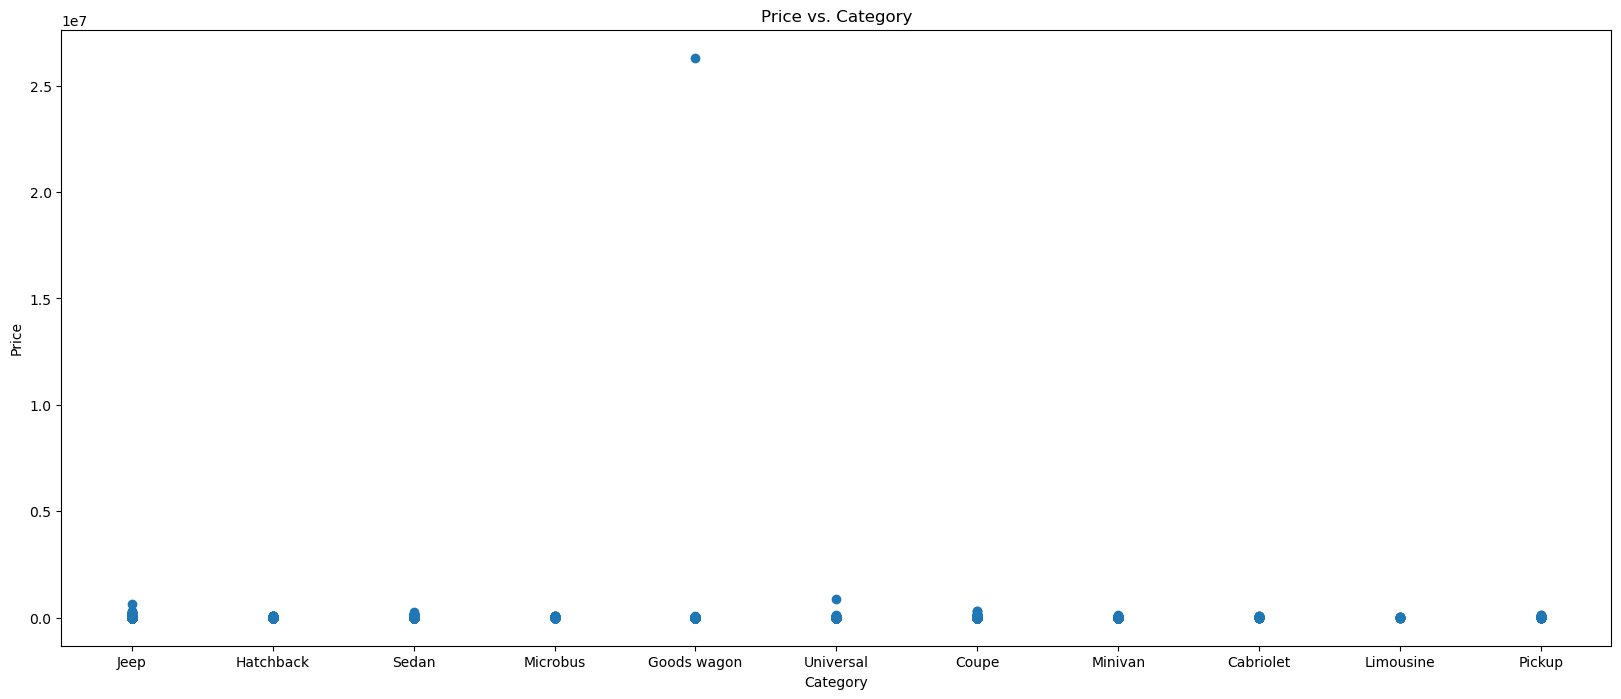

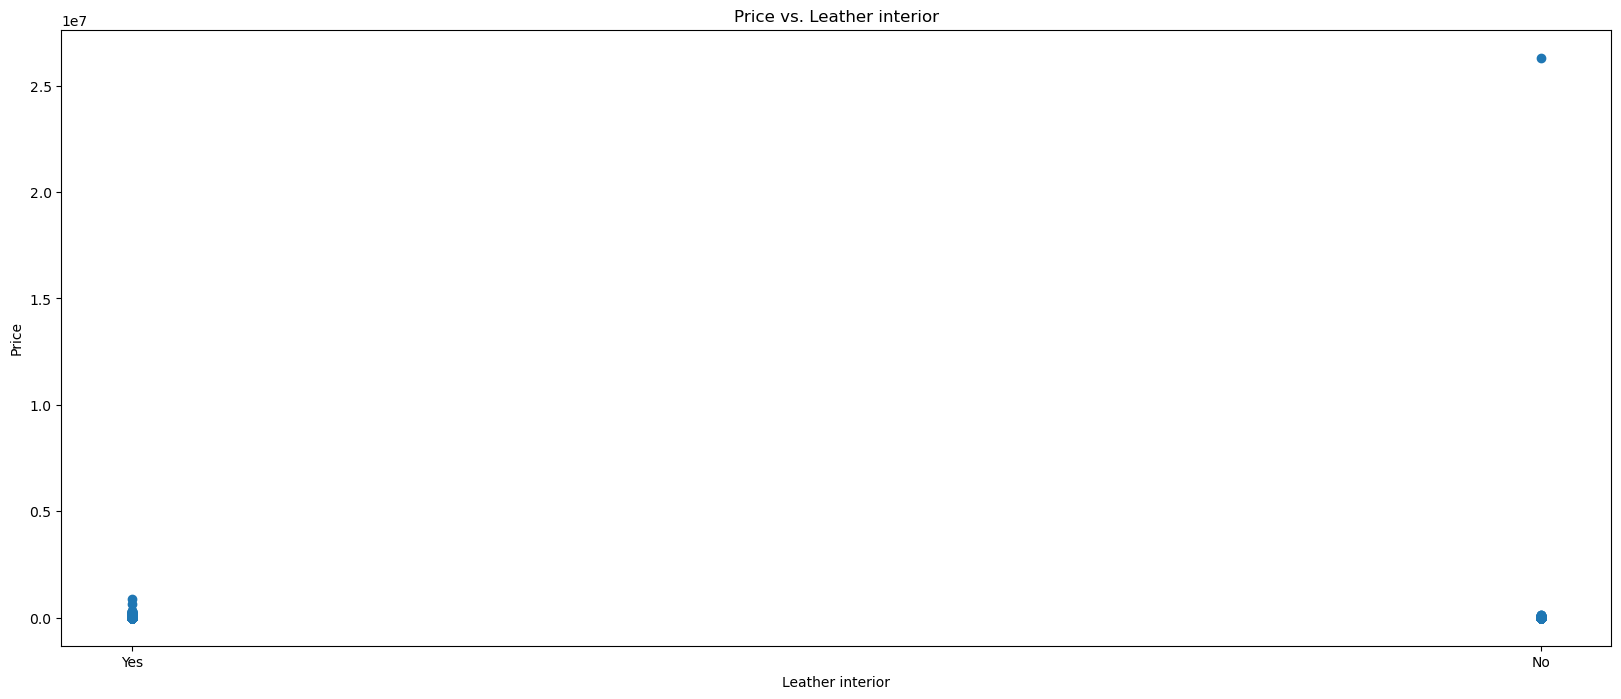

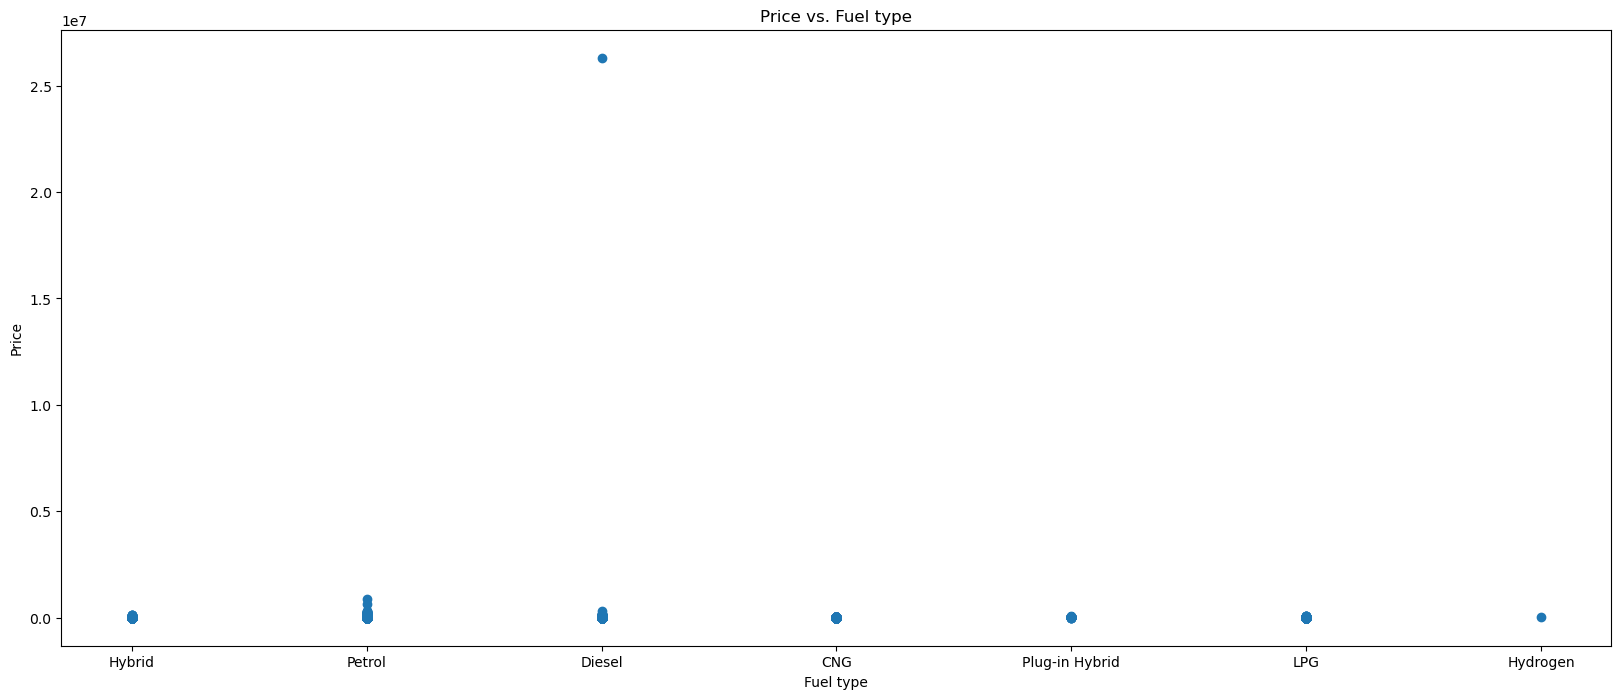

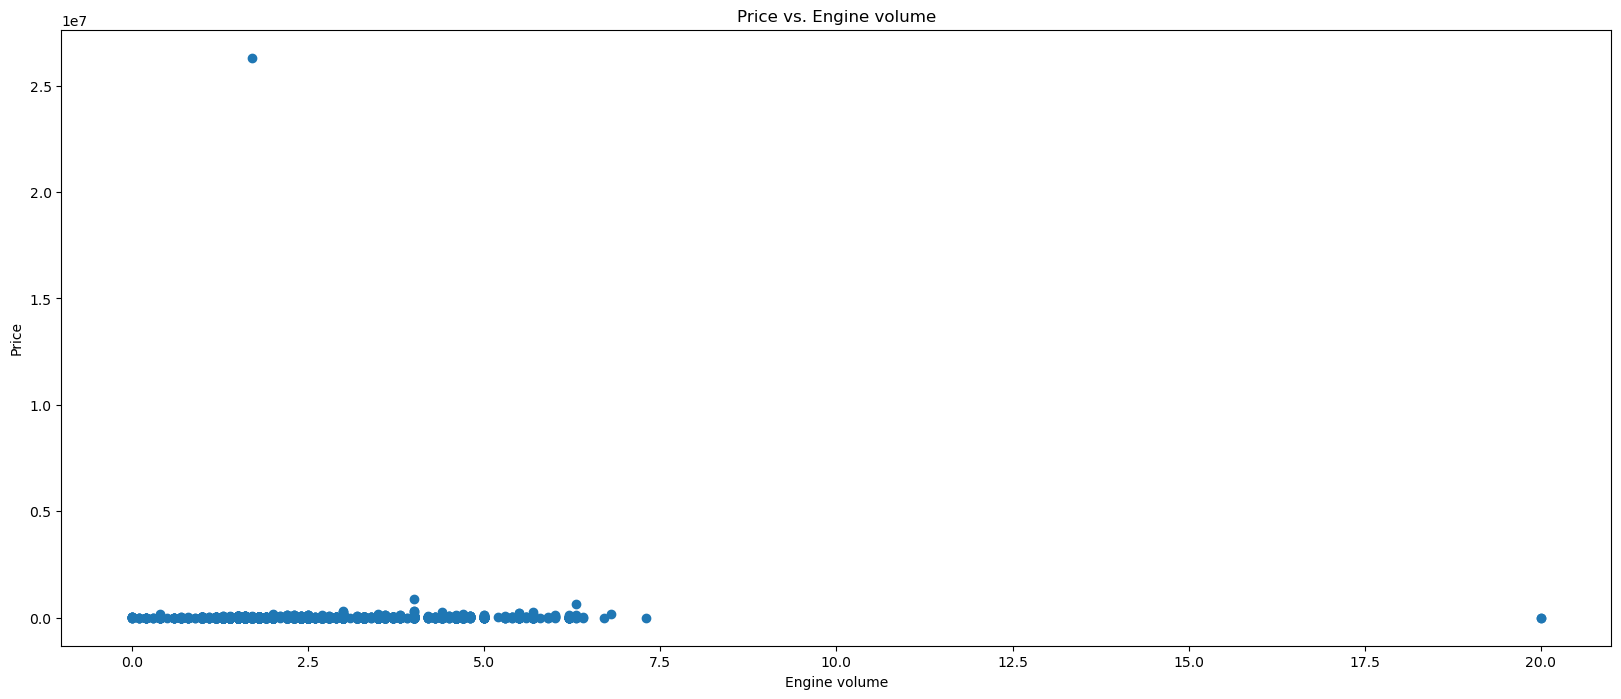

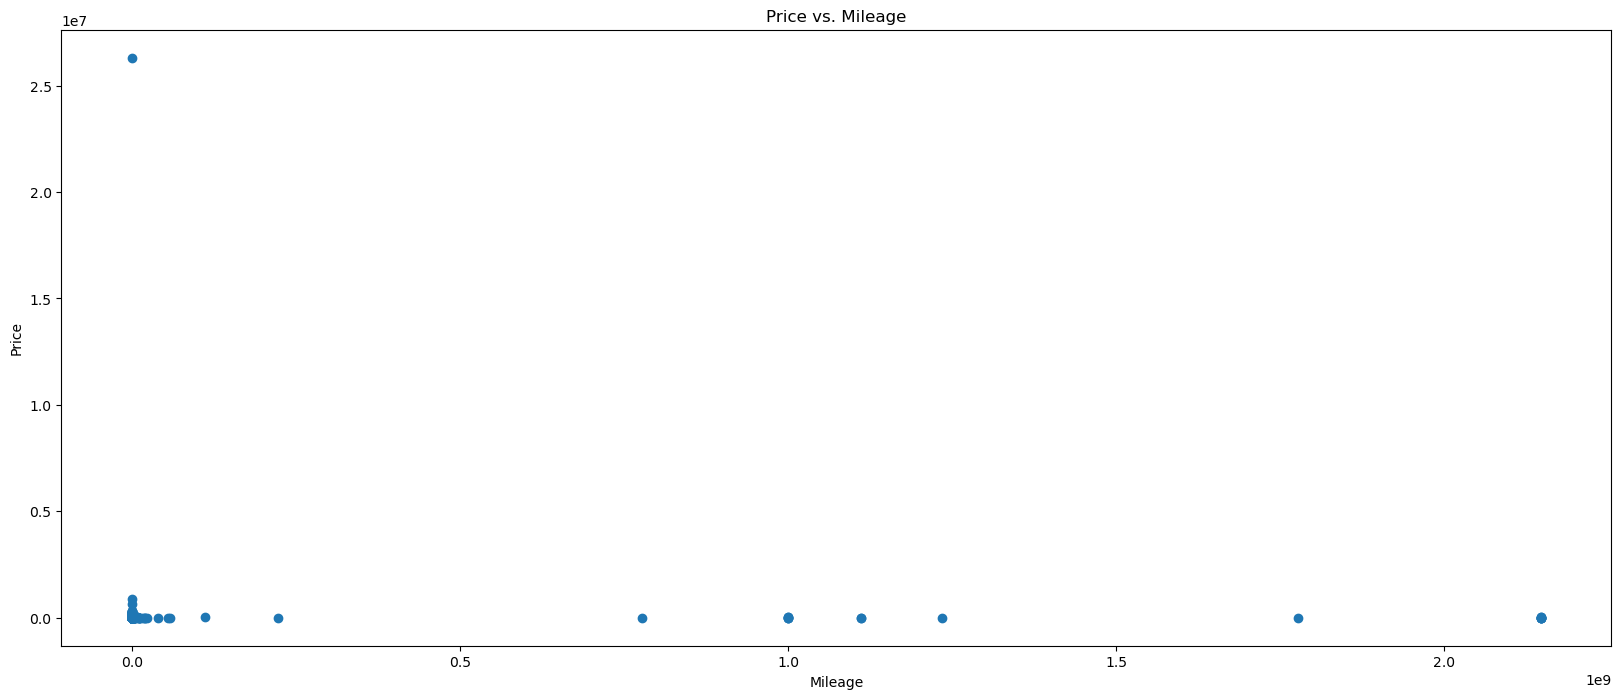

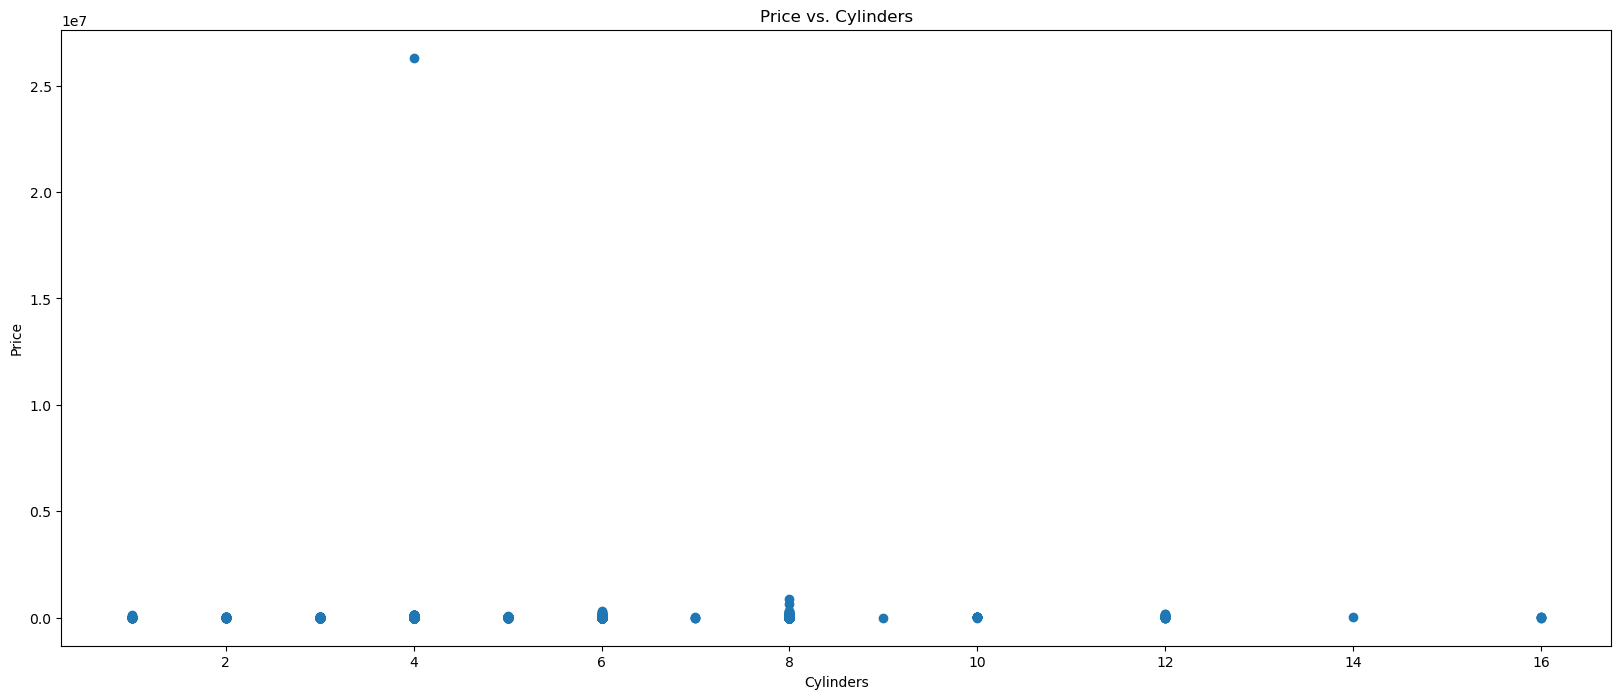

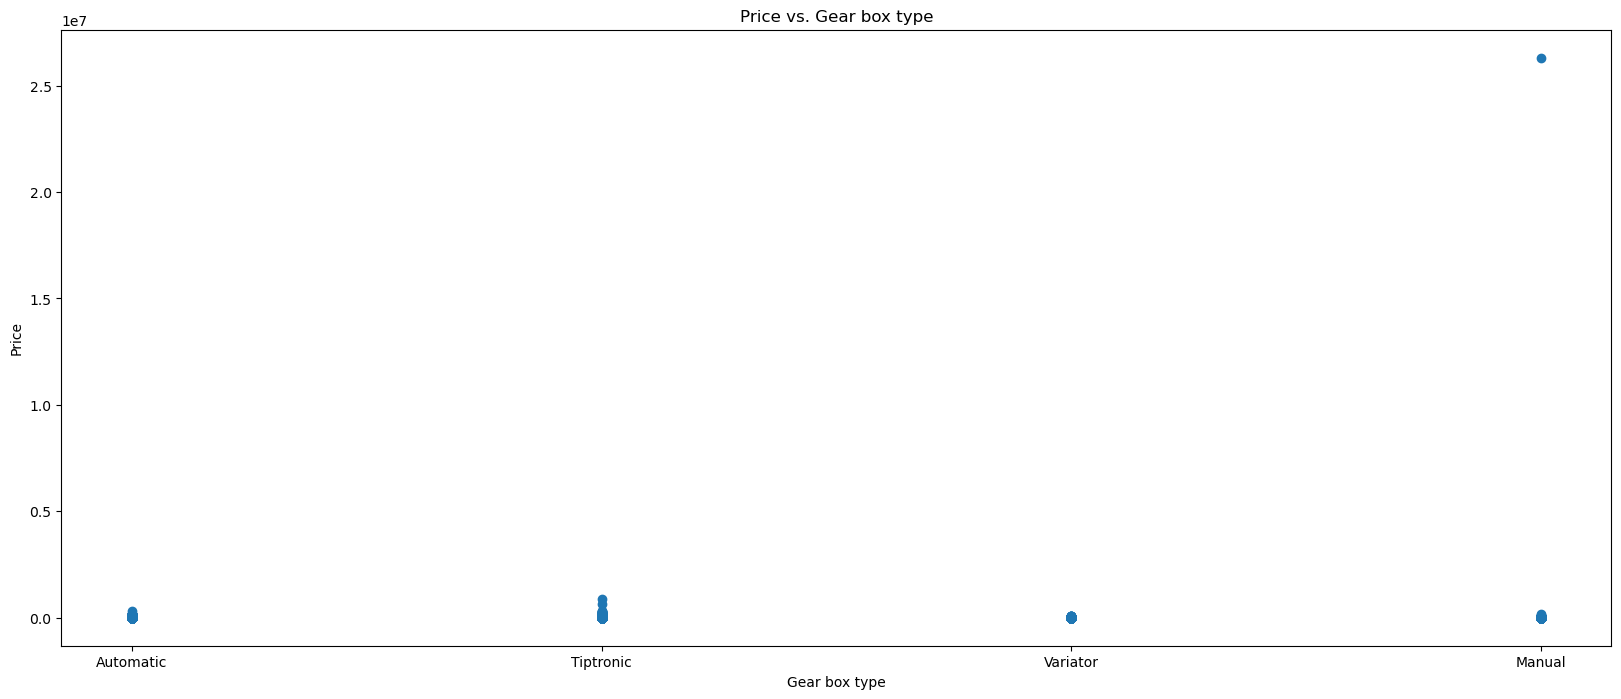

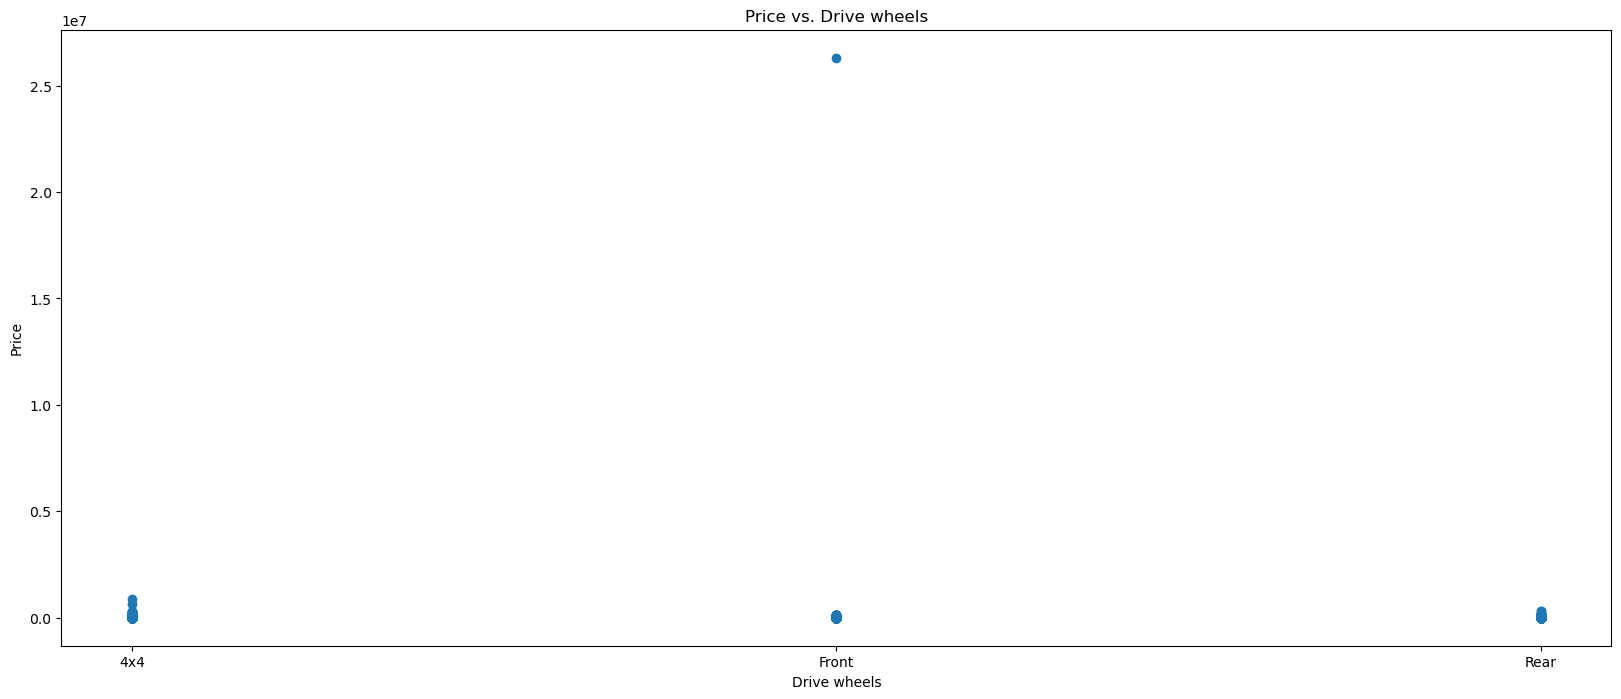

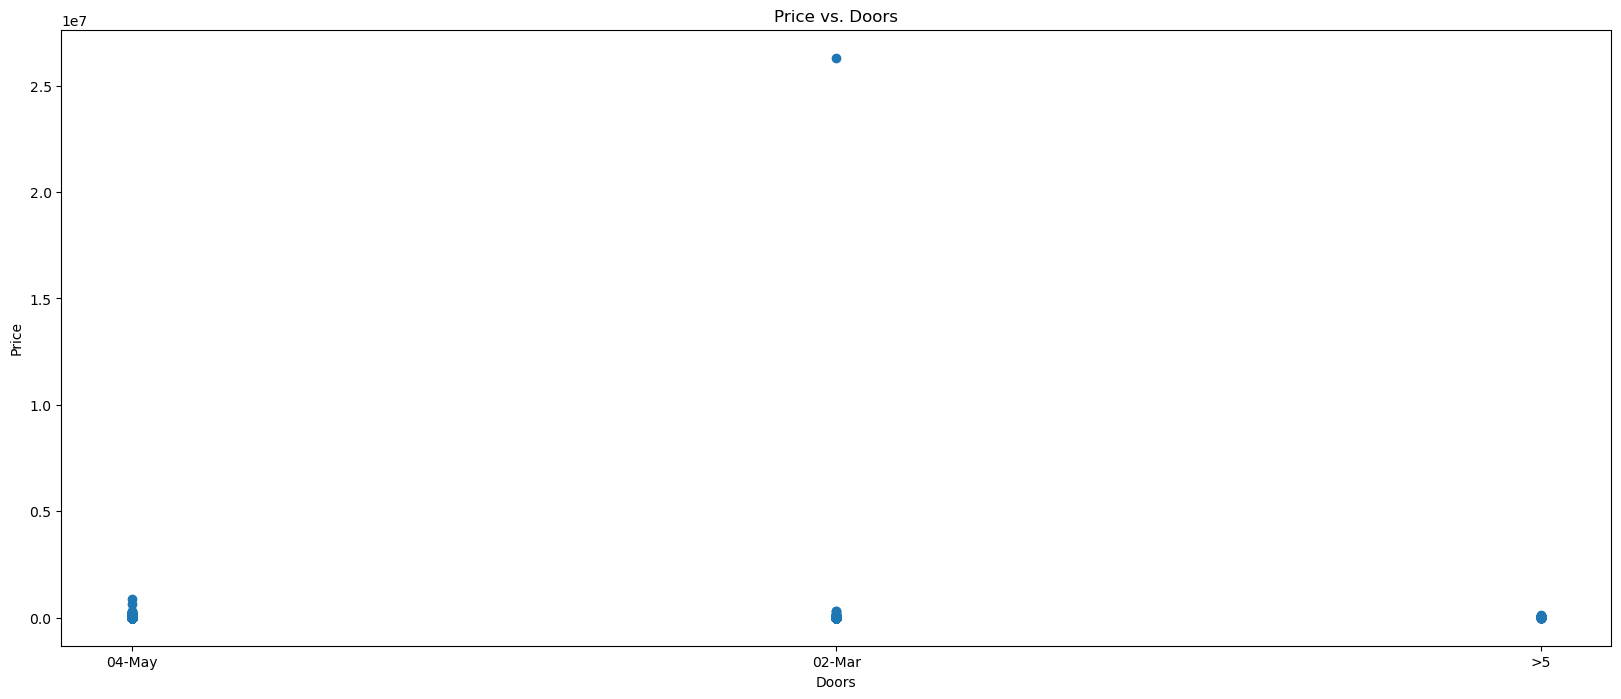

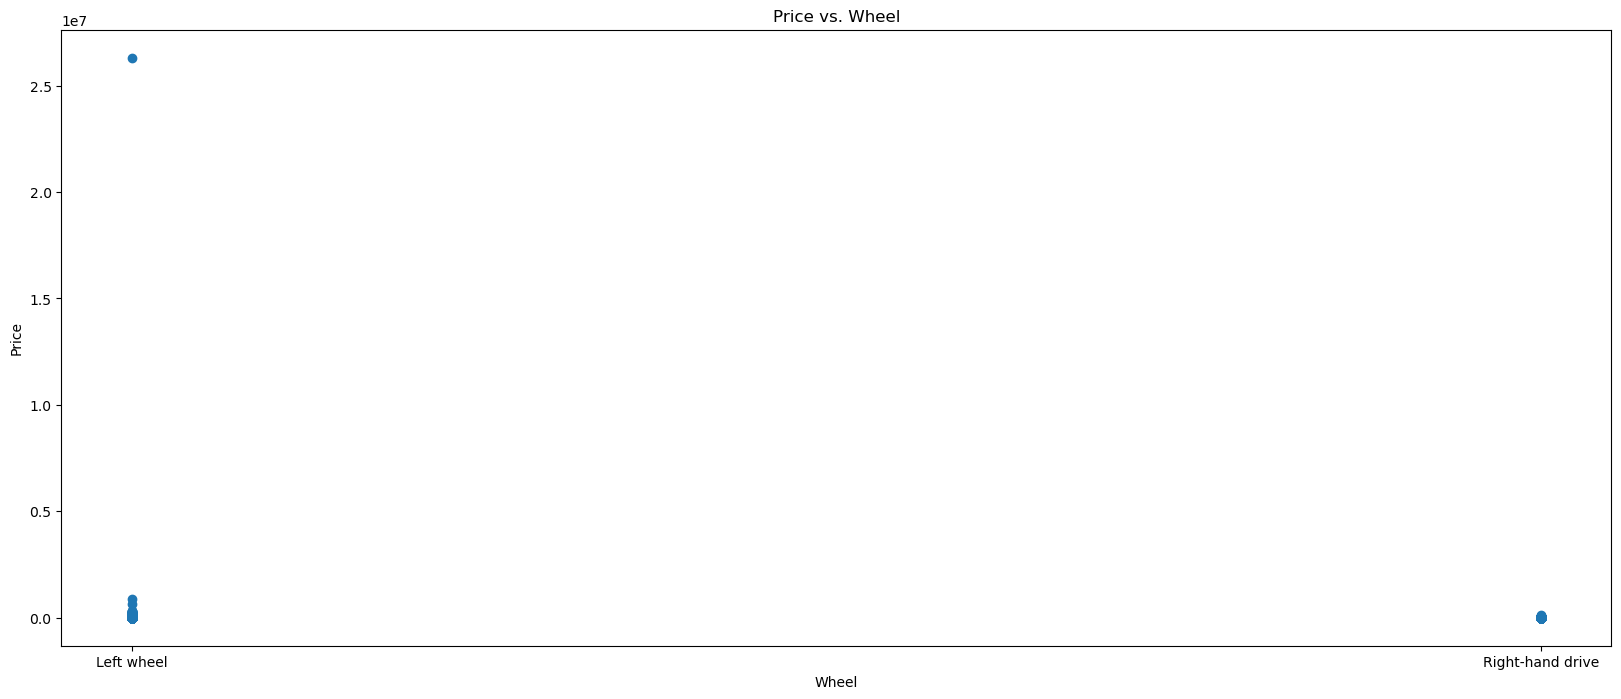

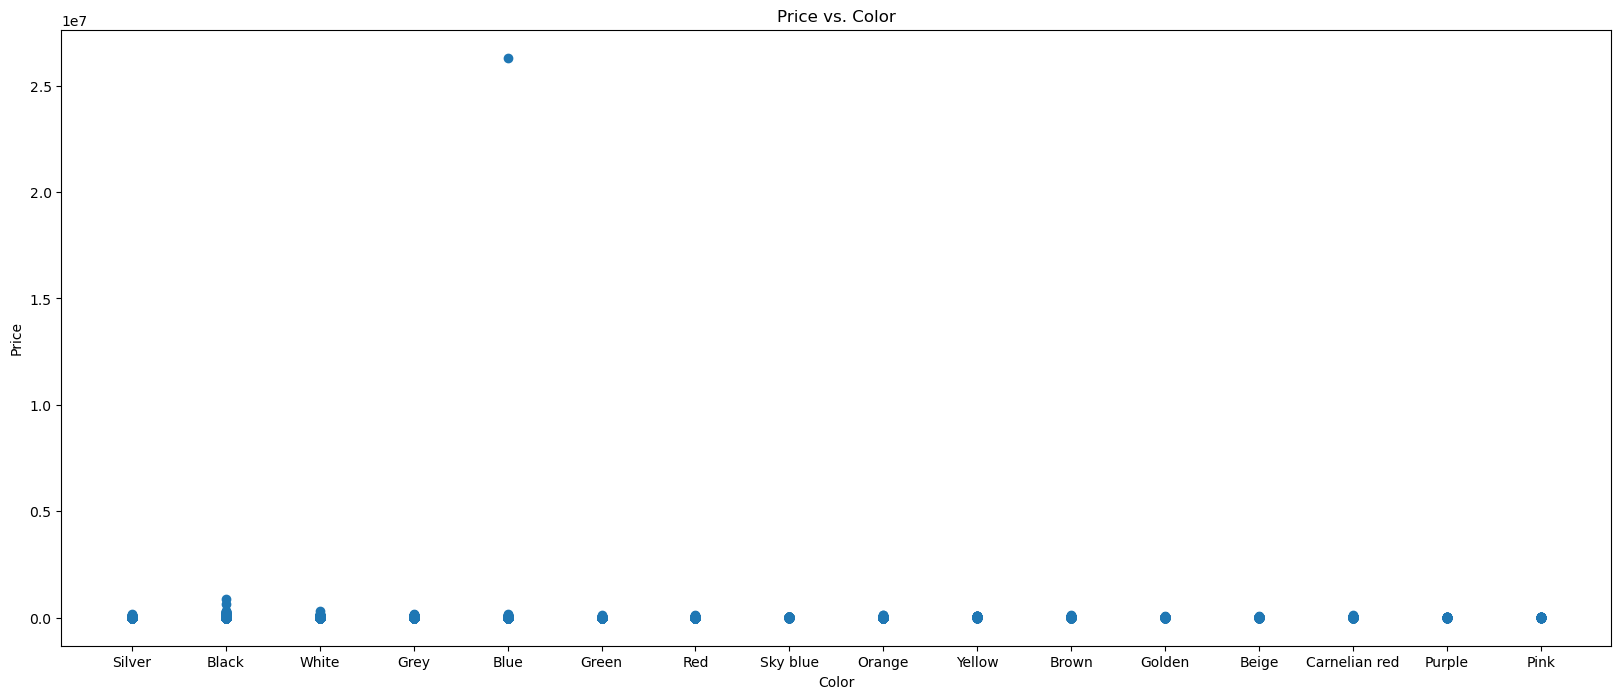

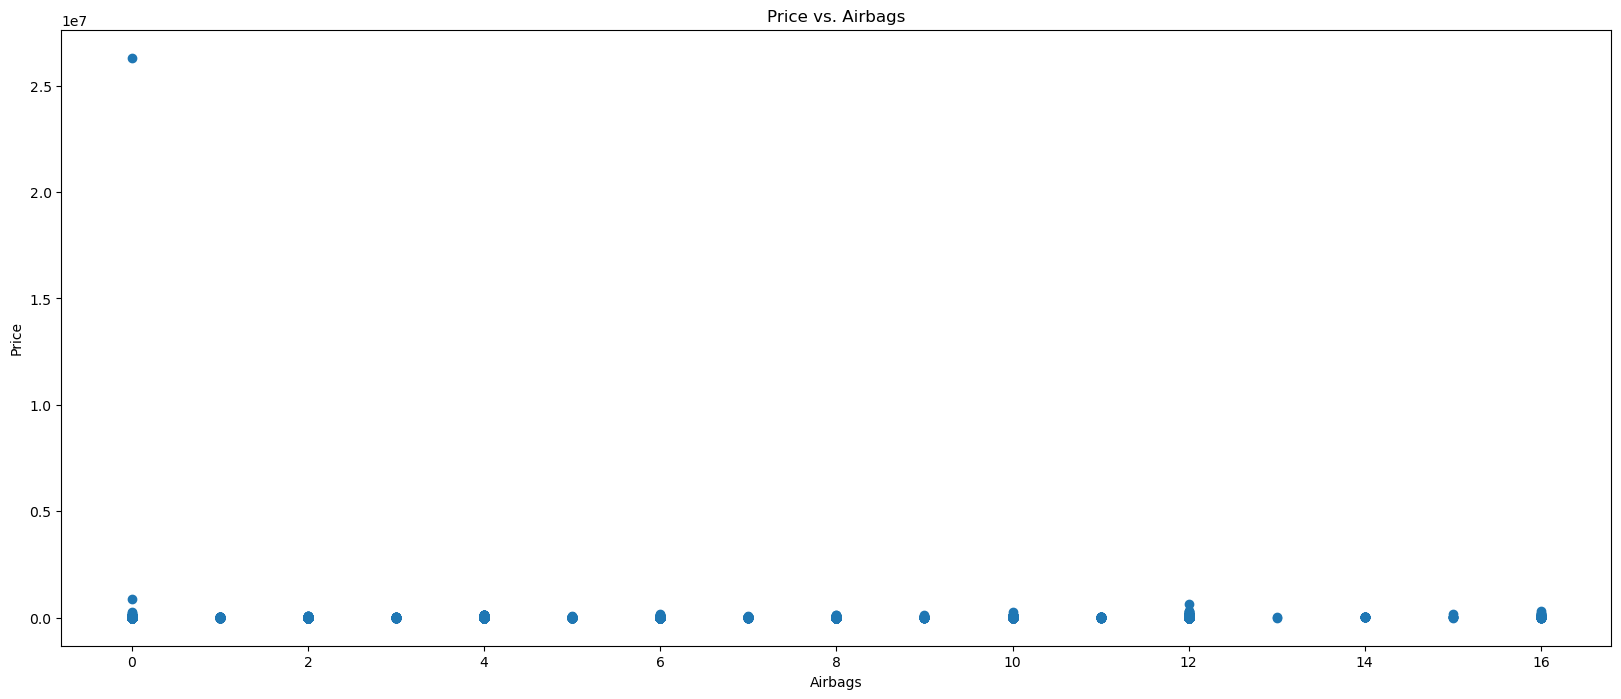

In [493]:
for item in df.columns:
    col = df[item]
    Price = df['Price']
    plt.scatter(col, Price)
    plt.xlabel(item)
    plt.ylabel('Price')
    plt.title('Price vs. ' + item)
    plt.show()

/tmp/ipykernel_9717/3370131688.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


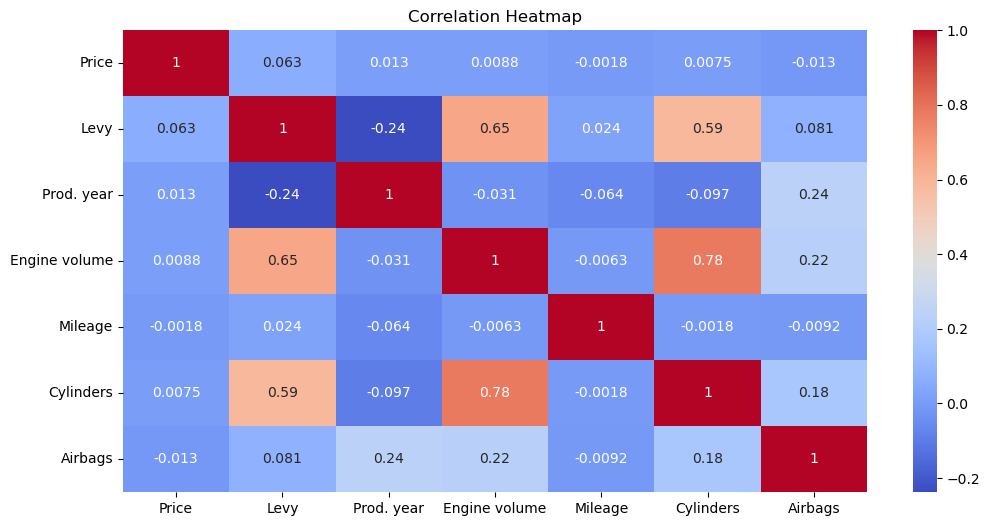

In [494]:
corr_matrix = df.corr()

# Create a heatmap plot
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [495]:
# we can remove duplicates Present in the data
df.drop_duplicates(inplace=True)

<Axes: >

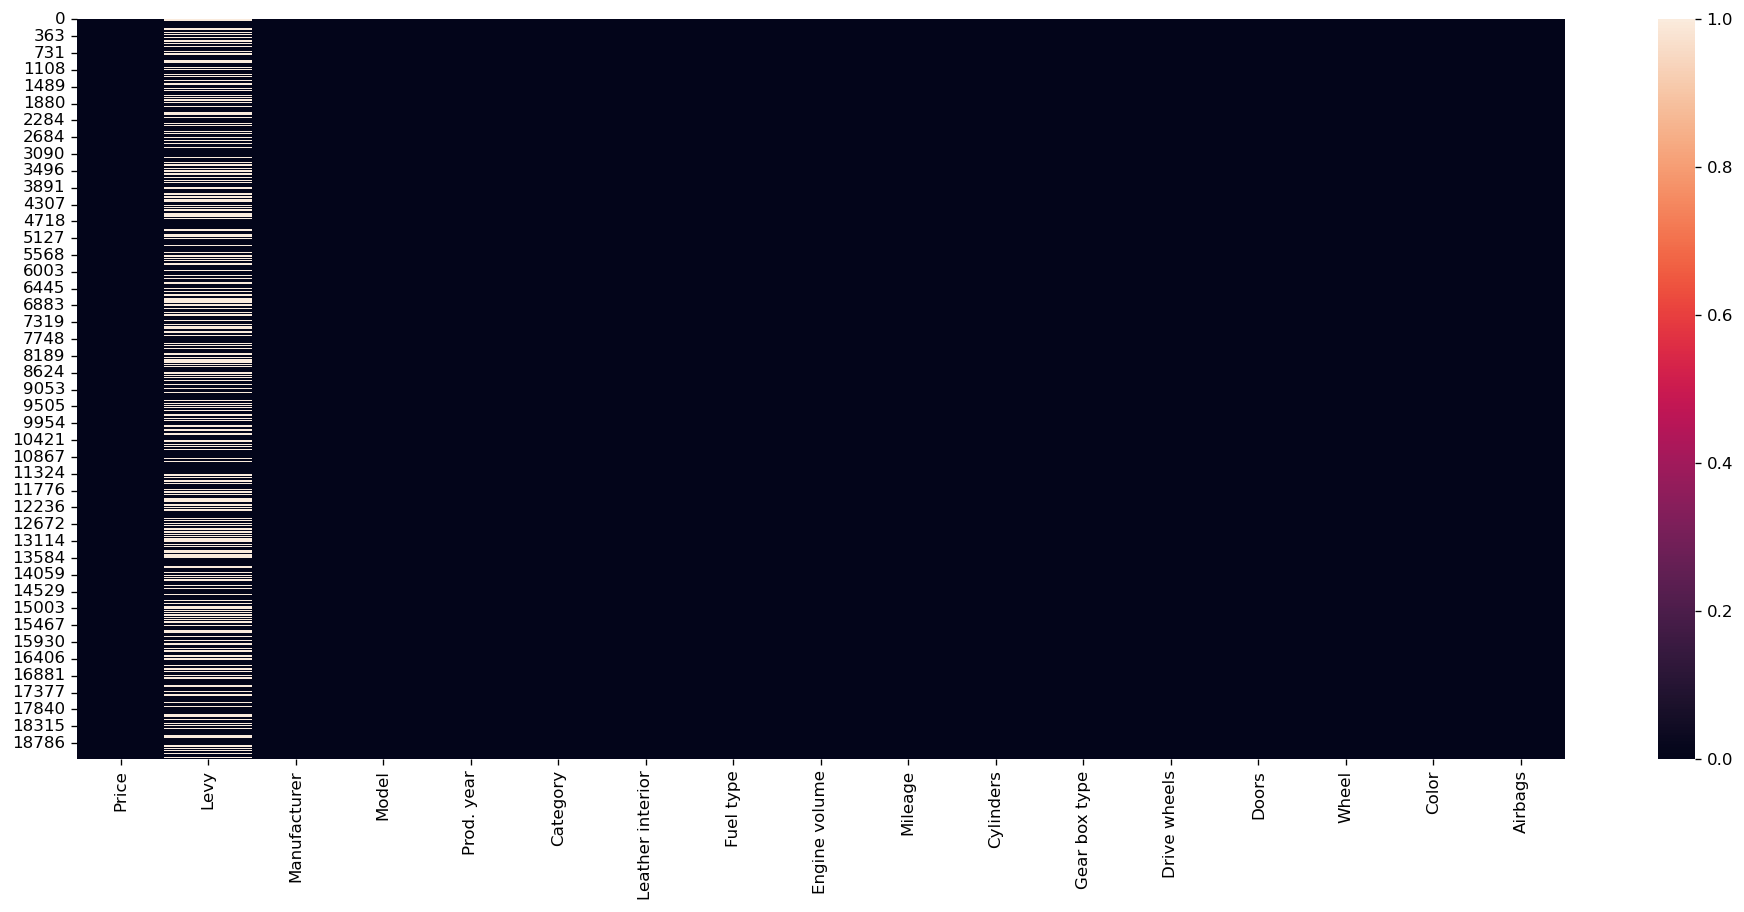

In [496]:
# checking for null values in the whole data set
plt.figure(dpi=120)
sns.heatmap(df.isna())

#### only Levy column have null values in the data set

In [497]:
df1 = df.copy()
df1['Levy'].fillna(df['Levy'].mean(),inplace = True)

<Axes: xlabel='Levy', ylabel='Density'>

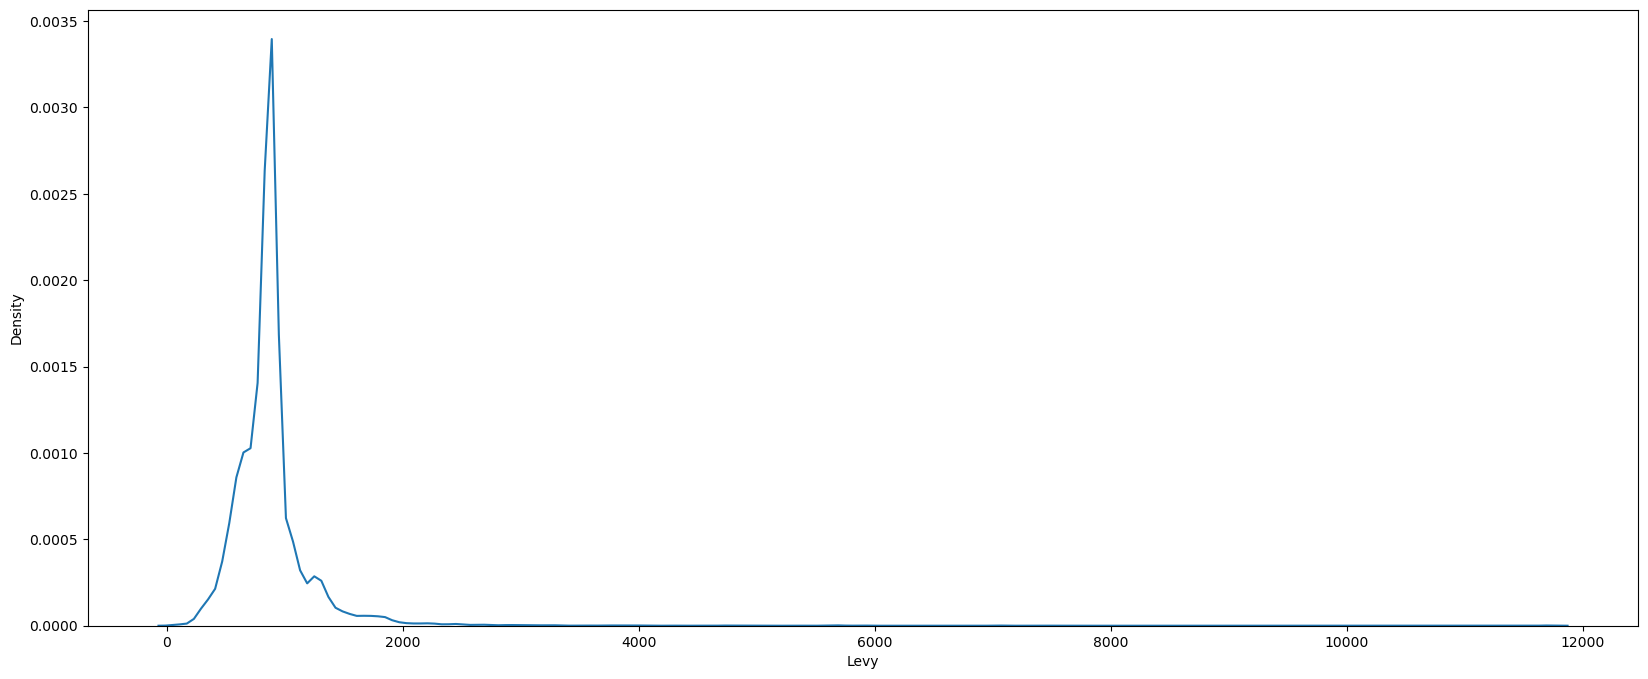

In [498]:
sns.kdeplot(df1['Levy'])

<Axes: xlabel='Levy', ylabel='Density'>

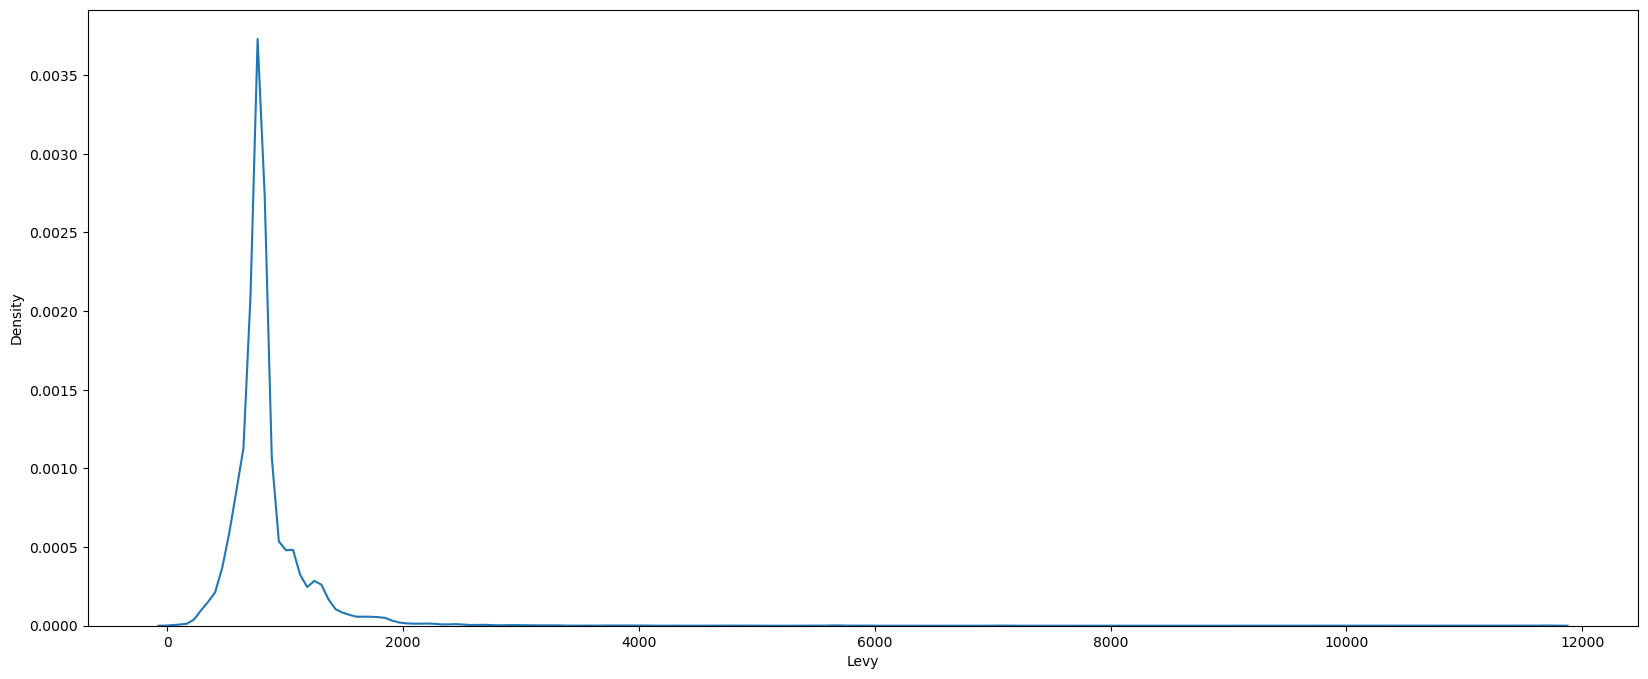

In [499]:
df['Levy'].fillna(df['Levy'].median(),inplace = True)
sns.kdeplot(df['Levy'])

In [500]:
df = df[df['Price'] > 500]
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

#### Replacing Null values with median is producing plot more similiar to original, we should choosing median

In [501]:
df.head(5)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,779.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [502]:
# Handling outliers by replace it by lower and upper bounds
def handling_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        for i in range(df.shape[0]):
            if data[col][i] < lower_bound:
                data[col][i] = lower_bound
            elif data[col][i] > upper_bound:
                data[col][i] = upper_bound
            else:
                continue
    return data


# Get Continus Columns
def get_continus_columns(data):
    obj = list(data.select_dtypes('object').columns)
    lst = list(data.columns)
    for col in obj:
        lst.remove(col)
    return lst

In [503]:
df_with_outliers = df.copy()

In [504]:
df = handling_outliers(df, get_continus_columns(df))

/tmp/ipykernel_9717/4187504357.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = upper_bound
/tmp/ipykernel_9717/4187504357.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = upper_bound
/tmp/ipykernel_9717/4187504357.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = lower_bound
/tmp/ipykernel_9717/4187504357.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [505]:
for col in df.select_dtypes('object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

## Model Building

In [506]:
x = df.drop(['Price'], axis=1).values
y = df['Price'].values
x = MinMaxScaler().fit_transform(x)

In [507]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [508]:
x_train

array([[0.45766129, 0.96825397, 0.81609195, ..., 0.        , 0.8       ,
        0.375     ],
       [0.45766129, 0.9047619 , 0.72924649, ..., 0.        , 0.13333333,
        0.5       ],
       [1.        , 0.9047619 , 0.2752235 , ..., 0.        , 0.2       ,
        0.625     ],
       ...,
       [0.        , 0.36507937, 0.399106  , ..., 0.        , 0.8       ,
        0.25      ],
       [0.68346774, 0.36507937, 0.8403576 , ..., 0.        , 0.53333333,
        0.25      ],
       [1.        , 0.57142857, 0.85887612, ..., 0.        , 0.93333333,
        0.125     ]])

In [509]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)
cb  = CatBoostRegressor(learning_rate =.07, max_depth =7, verbose=0)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]

Linear Regression : 38 %
K Nearest Neighbours : 63 %
Decision Tree : 49 %
Random Forest : 77 %
AdaBoost : 45 %
Gradient Boosting Regressor : 78 %
XGBRegressor : 78 %
CatBoostRegressor : 79 %


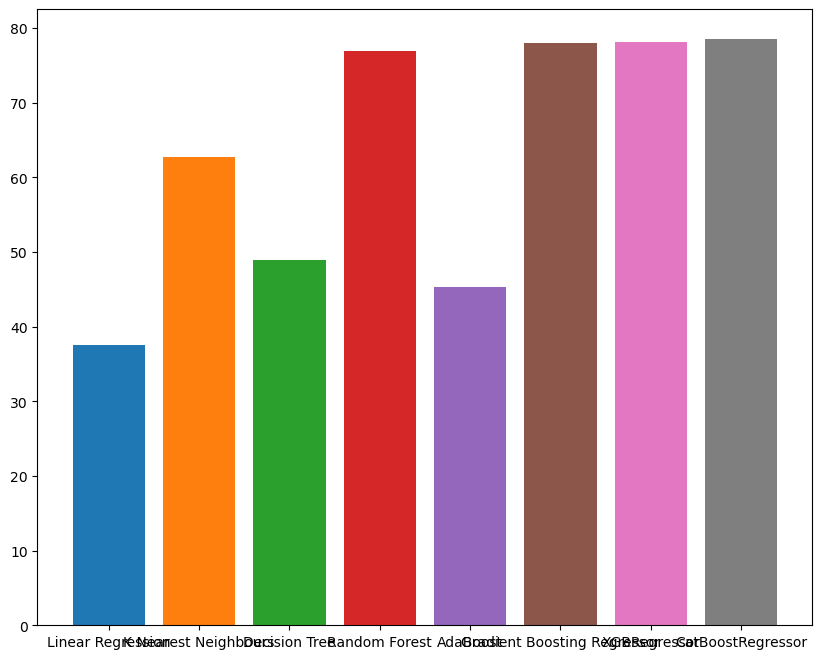

In [516]:
for regressor_name, regressor in regressors:

    regressor.fit(x_train, y_train)    
  
    y_pred = regressor.predict(x_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (10,8)
    plt.bar(regressor_name,accuracy)